In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-detection/valid/0/2030_992775426_png.rf.df85416a26dd4cb665bb104d6a34d303.jpg
/kaggle/input/breast-cancer-detection/valid/0/2564_1570678080_png.rf.135a908f06be029039778a6df2ab5149.jpg
/kaggle/input/breast-cancer-detection/valid/0/2704_781524556_png.rf.c3007300f84e02ef651821761af1c8a9.jpg
/kaggle/input/breast-cancer-detection/valid/0/294_2044098614_png.rf.1f17493146bfa674226f43a711f6c141.jpg
/kaggle/input/breast-cancer-detection/valid/0/866_1033311478_png.rf.ff97b307c7b296343424c8e5aa172c27.jpg
/kaggle/input/breast-cancer-detection/valid/0/370_1943620586_png.rf.6b2845edfbb223f65f126beabd7aee6a.jpg
/kaggle/input/breast-cancer-detection/valid/0/2546_730952035_png.rf.0aa3bdf9935f0ebed78558c5259bc6bb.jpg
/kaggle/input/breast-cancer-detection/valid/0/2282_2092132689_png.rf.8b110ae2768e8650d7b30dce6ed00e36.jpg
/kaggle/input/breast-cancer-detection/valid/0/561_1308043124_png.rf.e7f17d151c0e2df684b5569befe144f1.jpg
/kaggle/input/breast-cancer-detection/valid/0/2112_19

In [2]:
import glob
train_0_path='/kaggle/input/breast-cancer-detection/train/0'
train_1_path='/kaggle/input/breast-cancer-detection/test/1'
test_0_path='/kaggle/input/breast-cancer-detection/test/0'
test_1_path='/kaggle/input/breast-cancer-detection/test/1'
valid_0_path='/kaggle/input/breast-cancer-detection/valid/0'
valid_1_path='/kaggle/input/breast-cancer-detection/valid/1'


In [3]:
train_0_files=glob.glob(train_0_path+'/*')
train_1_files=glob.glob(train_1_path+'/*')
test_0_files=glob.glob(test_0_path+'/*')
test_1_files=glob.glob(test_1_path+'/*')
valid_0_files=glob.glob(valid_0_path+'/*')
valid_1_files=glob.glob(valid_1_path+'/*')



In [4]:
x_train=[]
y_train=[]
x_test=[]
y_test=[]
x_valid=[]
y_valid=[]
for files in train_0_files:
    x_train.append(files)
    y_train.append(0)
for files in train_1_files:
    x_train.append(files)
    y_train.append(1)
for files in test_0_files:
    x_test.append(files)
    y_test.append(0)
for files in test_1_files:
    x_test.append(files)
    y_test.append(1)
for files in valid_0_files:
    x_valid.append(files)
    y_valid.append(0)
for files in valid_1_files:
    x_valid.append(files)
    y_valid.append(1)

In [5]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))
print(len(x_valid))
print(len(y_valid))

1697
1697
336
336
675
675


In [6]:
num_0_train=0
num_1_train=0
num_0_test=0
num_1_test=0
num_0_valid=0
num_1_valid=0
for label in y_train:
    if label==0:
        num_0_train+=1
    else:
        num_1_train+=1
for label in y_test:
    if label==0:
        num_0_test+=1
    else :
        num_1_test+=1
for label in y_valid:
    if label==0:
        num_0_valid+=1
    else :
        num_1_valid+=1
print(num_0_train)
print(num_1_train)
print(num_0_test)
print(num_1_test)
print(num_0_valid)
print(num_1_valid)

1569
128
208
128
448
227


Image dimensions: (640, 640, 3)


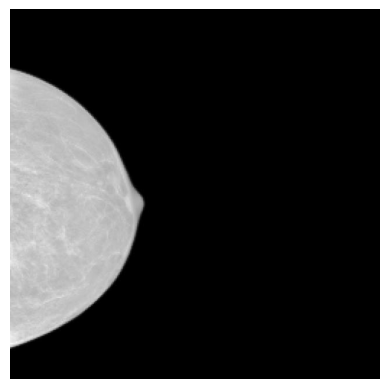

In [7]:
import cv2
import matplotlib.pyplot as plt
image= cv2.imread(x_train[0])
if image is not None:
    print("Image dimensions:", image.shape)
    # Afficher l'image avec Matplotlib
    plt.imshow(image)
    plt.axis('off')  # Masquer les axes
    plt.show()
else:
    print("Erreur : l'image n'a pas pu être chargée.")

In [8]:
x_train_images=[]
x_test_images=[]
x_valid_images=[]
import cv2
for i in range(len(x_train)):
    img=cv2.imread(x_train[i],cv2.IMREAD_GRAYSCALE)
    img=cv2.resize(img,(224,224))
    x_train_images.append(img)
for i in range(len(x_test)):
    img=cv2.imread(x_test[i],cv2.IMREAD_GRAYSCALE)
    img=cv2.resize(img,(224,224))
    x_test_images.append(img)
for i in range(len(x_valid)):
    img=cv2.imread(x_valid[i],cv2.IMREAD_GRAYSCALE)
    img=cv2.resize(img,(224,224))
    x_valid_images.append(img)

In [9]:
import numpy as np

# Convertir les listes en tableaux NumPy
x_train_images_np = np.array(x_train_images)
x_test_images_np = np.array(x_test_images)
x_valid_images_np = np.array(x_valid_images)

# Concaténer les tableaux NumPy
data = np.concatenate((x_train_images_np, x_test_images_np, x_valid_images_np), axis=0)

# Optionnel : Afficher le shape du tableau résultant
print(f"Shape du tableau concaténé : {data.shape}")


Shape du tableau concaténé : (2708, 224, 224)


In [10]:
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)
y_valid_np = np.array(y_valid)


labels = np.concatenate([y_train_np, y_test_np, y_valid_np])

print(f"Shape du labels : {labels.shape}")


Shape du labels : (2708,)


In [11]:
from sklearn.utils import shuffle

# Mélanger les données d'entraînement et les étiquettes
data, labels = shuffle(data,labels)


Image dimensions: (224, 224)


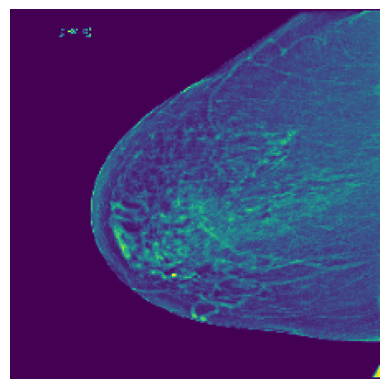

In [12]:

image= data[0]
if image is not None:
    print("Image dimensions:", image.shape)
    # Afficher l'image avec Matplotlib
    plt.imshow(image)
    plt.axis('off')  # Masquer les axes
    plt.show()
else:
    print("Erreur : l'image n'a pas pu être chargée.")

In [13]:
num_0 = np.sum(labels == 0)
num_1 = np.sum(labels == 1)
print(num_0)
print(num_1)

2225
483


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,  # Normalisation
                             rotation_range=15,
                             width_shift_range=0.05,
                             height_shift_range=0.05,
                             shear_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True,
                             fill_mode='nearest')


In [15]:
minority_class_images = [data[i] for i in range(len(labels)) if labels[i] == 1]
minority_class_images = np.array(minority_class_images)


In [16]:
augmented_data = []
augmented_labels = []

# Calculer le nombre d'images à générer pour équilibrer les classes
num_augmented_images_needed = num_0 - num_1

for i in range(num_augmented_images_needed):
    # Sélectionner une image aléatoire parmi les images de la classe minoritaire
    img = minority_class_images[i % len(minority_class_images)]
    
    # Vérifier et ajuster la forme de l'image en fonction des canaux
    if len(img.shape) == 2:  # Si l'image est en 2D (224, 224), ajouter un canal (grayscale)
        img = img.reshape((1, 224, 224, 1))
    elif len(img.shape) == 3 and img.shape[-1] != 3:  # Si c'est une image couleur avec mauvaise forme
        img = img.reshape((1, 224, 224, 3))
    
    # Générer une nouvelle image augmentée
    for augmented_img in datagen.flow(img, batch_size=1):
        augmented_data.append(augmented_img[0])  # Ajouter l'image augmentée
        augmented_labels.append(1)  # Ajouter le label de la classe minoritaire
        break  # On génère une seule image par itération

# Convertir les listes en arrays numpy
augmented_data = np.array(augmented_data)
augmented_labels = np.array(augmented_labels)


Image dimensions: (224, 224, 1)


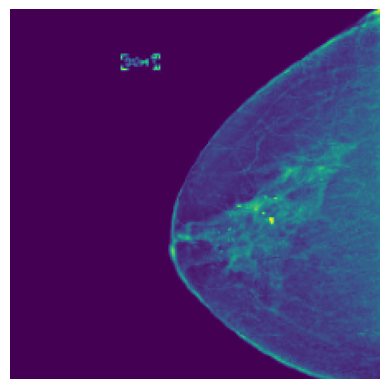

In [17]:
image= augmented_data[0]
if image is not None:
    print("Image dimensions:", image.shape)
    # Afficher l'image avec Matplotlib
    plt.imshow(image)
    plt.axis('off')  # Masquer les axes
    plt.show()
else:
    print("Erreur : l'image n'a pas pu être chargée.")

In [18]:
augmented_data = np.squeeze(augmented_data, axis=-1)  # Supprime la dernière dimension (canal)
print("Original data shape:", data[0].shape)  # (224, 224)
print("Augmented data shape:", augmented_data[0].shape)  # Cela devrait maintenant être (224, 224)


Original data shape: (224, 224)
Augmented data shape: (224, 224)


Image dimensions: (224, 224)


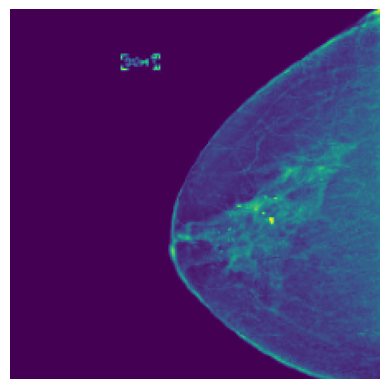

In [19]:
image= augmented_data[0]
if image is not None:
    print("Image dimensions:", image.shape)
    # Afficher l'image avec Matplotlib
    plt.imshow(image)
    plt.axis('off')  # Masquer les axes
    plt.show()
else:
    print("Erreur : l'image n'a pas pu être chargée.")

In [20]:
data_balanced = np.concatenate((data, augmented_data), axis=0)
labels_balanced = np.concatenate((labels, augmented_labels), axis=0)
print("Balanced data shape:", data_balanced.shape)
print("Balanced labels shape:", labels_balanced.shape)

Balanced data shape: (4450, 224, 224)
Balanced labels shape: (4450,)


In [21]:
num_0_balanced = np.sum(labels_balanced == 0)
num_1_balanced = np.sum(labels_balanced == 1)

print(f"Nombre d'images dans la classe 0 après équilibrage : {num_0_balanced}")
print(f"Nombre d'images dans la classe 1 après équilibrage : {num_1_balanced}")

Nombre d'images dans la classe 0 après équilibrage : 2225
Nombre d'images dans la classe 1 après équilibrage : 2225


In [22]:
data_balanced, labels_balanced = shuffle(data_balanced,labels_balanced)


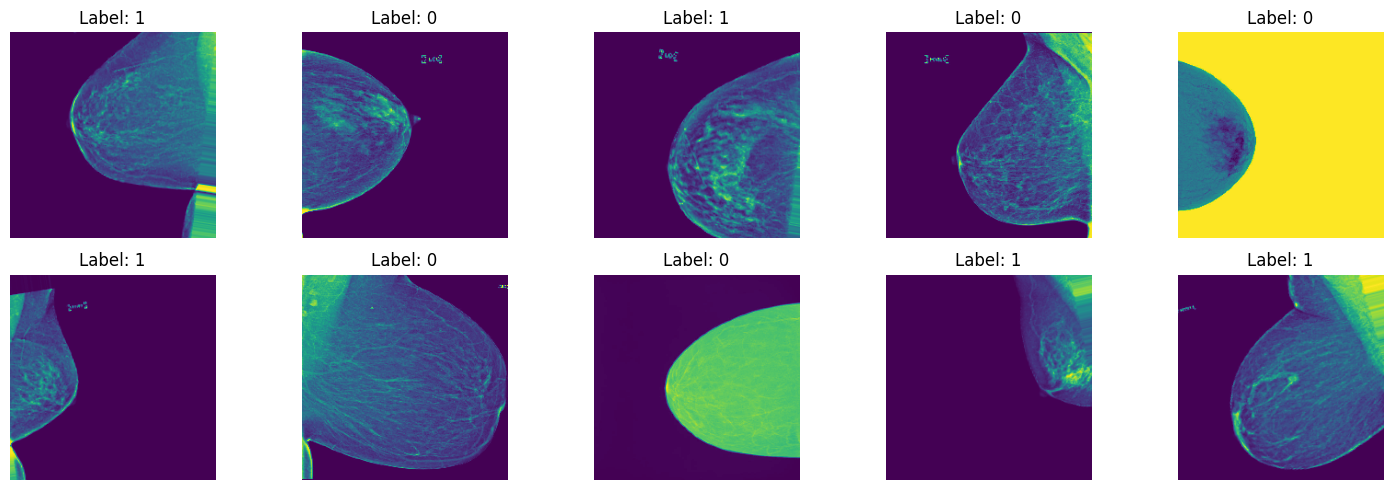

In [23]:
import cv2
import matplotlib.pyplot as plt
num_images = 10
fig, axes = plt.subplots(2, 5, figsize=(15, 5))
for i, ax in enumerate(axes.flat):
    if i < num_images:
        
        ax.imshow(data_balanced[i])
        ax.set_title(f"Label: {labels_balanced[i]}")
        ax.axis('off')
plt.tight_layout()
plt.show()

In [24]:
# Vérification des formes avant la division
print(f"Data balanced shape: {data_balanced.shape}")  # (4450, 224, 224)
print(f"Labels balanced shape: {labels_balanced.shape}")  # (4450,)

# Si tout est correct, appliquez train_test_split
if data_balanced.shape[0] == labels_balanced.shape[0]:
    from sklearn.model_selection import train_test_split
    
    # Première division : 80% pour entraînement+validation et 20% pour test
    x_train_val, x_test, y_train_val, y_test = train_test_split(
        data_balanced, labels_balanced, 
        test_size=0.2, random_state=42, stratify=labels_balanced
    )
    
    # Deuxième division : 80% pour entraînement et 20% pour validation (sur les données de train_val)
    x_train, x_val, y_train, y_val = train_test_split(
        x_train_val, y_train_val, 
        test_size=0.2, random_state=42, stratify=y_train_val
    )
    
    # Afficher les tailles des ensembles
    print(f"Train set: {len(x_train)} samples")
    print(f"Validation set: {len(x_val)} samples")
    print(f"Test set: {len(x_test)} samples")
else:
    print("Les dimensions des données et des étiquettes sont incohérentes.")


Data balanced shape: (4450, 224, 224)
Labels balanced shape: (4450,)
Train set: 2848 samples
Validation set: 712 samples
Test set: 890 samples


In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.02,
    height_shift_range=0.02,
    zoom_range=0.01,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_val_datagen = ImageDataGenerator(rescale=1./255) 

Image dimensions: (224, 224)


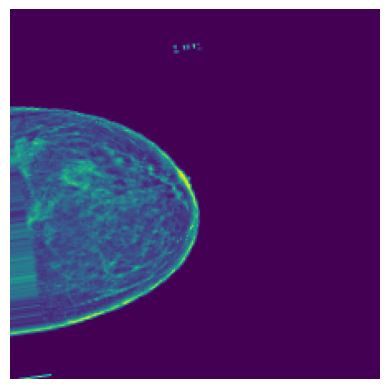

In [26]:
image= x_train[0]
if image is not None:
    print("Image dimensions:", image.shape)
    # Afficher l'image avec Matplotlib
    plt.imshow(image)
    plt.axis('off')  # Masquer les axes
    plt.show()
else:
    print("Erreur : l'image n'a pas pu être chargée.")

Image dimensions: (224, 224)


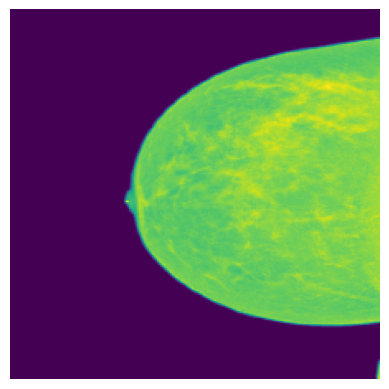

In [27]:
image= x_test[0]
if image is not None:
    print("Image dimensions:", image.shape)
    # Afficher l'image avec Matplotlib
    plt.imshow(image)
    plt.axis('off')  # Masquer les axes
    plt.show()
else:
    print("Erreur : l'image n'a pas pu être chargée.")

Image dimensions: (224, 224)


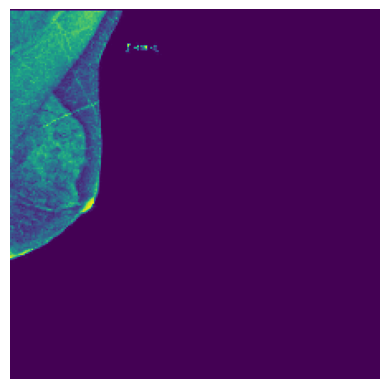

In [28]:
image= x_val[0]
if image is not None:
    print("Image dimensions:", image.shape)
    # Afficher l'image avec Matplotlib
    plt.imshow(image)
    plt.axis('off')  # Masquer les axes
    plt.show()
else:
    print("Erreur : l'image n'a pas pu être chargée.")

Shape after processing: (224, 224, 3)


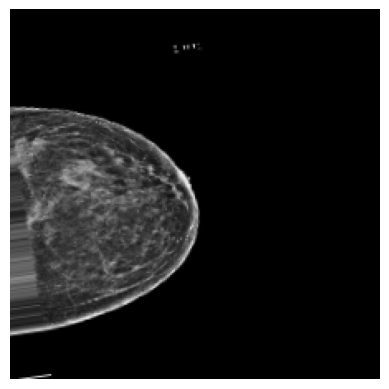

In [29]:

# Boucle pour redimensionner et s'assurer que les images ont 3 canaux
data_processed = []
for img in x_train:
    # Si l'image n'a qu'une seule dimension (grayscale)
    if len(img.shape) == 2:
        # Convertir en image RGB en dupliquant le canal
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    elif img.shape[2] == 1:
        # Si une image a un seul canal (grayscale dans certains cas)
        img = np.repeat(img, 3, axis=-1)
    
    # Redimensionner à (224, 224)
    img = cv2.resize(img, (224, 224))
    
    # Ajouter à la liste des données traitées
    data_processed.append(img)

# Convertir la liste en array numpy (format attendu par les générateurs Keras)
x_train_processed = np.array(data_processed)

# Afficher la forme de la première image traitée
print("Shape after processing:", x_train_processed[0].shape)

# Vérifier visuellement l'image
plt.imshow(x_train_processed[0])
plt.axis('off')  # Masquer les axes
plt.show()



Shape after processing: (224, 224, 3)


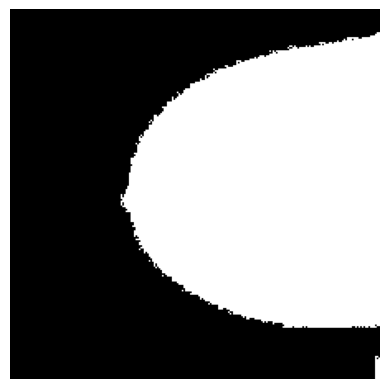

In [30]:

data_processed = []
for img in x_test:

    if len(img.shape) == 2:

        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    elif img.shape[2] == 1:

        img = np.repeat(img, 3, axis=-1)

    img = cv2.resize(img, (224, 224))

    data_processed.append(img)

x_test_processed = np.array(data_processed)


print("Shape after processing:", x_test_processed[0].shape)


plt.imshow(x_test_processed[0])
plt.axis('off')  
plt.show()


Shape after processing: (224, 224, 3)


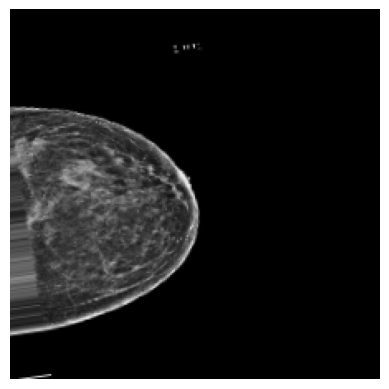

In [31]:

data_processed = []
for img in x_val:
    if len(img.shape) == 2:

        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    elif img.shape[2] == 1:

        img = np.repeat(img, 3, axis=-1)
    
    img = cv2.resize(img, (224, 224))

    data_processed.append(img)

x_val_processed = np.array(data_processed)

print("Shape after processing:", x_val_processed[0].shape)

plt.imshow(x_train_processed[0])
plt.axis('off') 
plt.show()


In [32]:
train_generator = train_datagen.flow(x_train_processed, y_train, batch_size=32, shuffle=True)
test_generator = test_val_datagen.flow(x_test_processed, y_test, batch_size=32, shuffle=False)
validation_generator = test_val_datagen.flow(x_val_processed, y_val, batch_size=32, shuffle=False)



In [33]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D,Dropout
from tensorflow.keras.applications import InceptionV3

base_model =InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)  
x = Flatten()(x)  
x = Dense(256, activation='relu')(x) 
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)  

model = Model(inputs=base_model.input, outputs=x)

# Compiling the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 22,327,585 (85.17 MB)

 Trainable params: 524,801 (2.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [34]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau

# Defining Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)




In [35]:
history = model.fit(
    train_generator,  
    validation_data=validation_generator,  
    epochs=50,
    callbacks=[early_stop, checkpoint,reduce_lr]  
)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1734078851.248827      68 service.cc:145] XLA service 0x79f044002040 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734078851.248897      68 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 2/89 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.2656 - loss: 0.7964  

I0000 00:00:1734078860.709486      68 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


88/89 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.7801 - loss: 0.4949
Epoch 1: val_loss improved from inf to 0.29652, saving model to best_model.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 53s 387ms/step - accuracy: 0.7817 - loss: 0.4928 - val_accuracy: 0.9003 - val_loss: 0.2965 - learning_rate: 1.0000e-04
Epoch 2/50
88/89 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.8663 - loss: 0.3560
Epoch 2: val_loss improved from 0.29652 to 0.28874, saving model to best_model.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 28s 287ms/step - accuracy: 0.8664 - loss: 0.3558 - val_accuracy: 0.9017 - val_loss: 0.2887 - learning_rate: 1.0000e-04
Epoch 3/50
88/89 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 0.8788 - loss: 0.3271
Epoch 3: val_loss improved from 0.28874 to 0.28640, saving model to best_model.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 27s 279ms/step - accuracy: 0.8789 - loss: 0.3267 - val_accuracy: 0.9045 - val_loss: 0.2864 - learning_rate: 1.0000e-04
Epoch 4/50
88/89 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 

In [36]:

for layer in base_model.layers[-20:]: 
    layer.trainable = True

In [37]:

# Recompiling the model 
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Fine tuning
history = model.fit(
    train_generator,  
    validation_data=validation_generator,  
    epochs=50,
    callbacks=[early_stop, checkpoint,reduce_lr]  
)

Epoch 1/50
88/89 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.8936 - loss: 0.2580
Epoch 1: val_loss did not improve from 0.25394
89/89 ━━━━━━━━━━━━━━━━━━━━ 48s 350ms/step - accuracy: 0.8935 - loss: 0.2583 - val_accuracy: 0.9031 - val_loss: 0.2585 - learning_rate: 1.0000e-05
Epoch 2/50
88/89 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.8922 - loss: 0.2579
Epoch 2: val_loss did not improve from 0.25394
89/89 ━━━━━━━━━━━━━━━━━━━━ 27s 277ms/step - accuracy: 0.8922 - loss: 0.2581 - val_accuracy: 0.9031 - val_loss: 0.2561 - learning_rate: 1.0000e-05
Epoch 3/50
88/89 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.8829 - loss: 0.2693
Epoch 3: val_loss did not improve from 0.25394
89/89 ━━━━━━━━━━━━━━━━━━━━ 27s 276ms/step - accuracy: 0.8831 - loss: 0.2692 - val_accuracy: 0.9031 - val_loss: 0.2540 - learning_rate: 1.0000e-05
Epoch 4/50
88/89 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.8956 - loss: 0.2436
Epoch 4: val_loss did not improve from 0.25394
89/89 ━━━━━━━━━━━━━━━━━━━━ 27s

In [38]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('/kaggle/working/best_model.keras')

# Evaluate the model on the test set
accuracy = model.evaluate(test_generator)[1]

# Print the test accuracy
print(f"Test Accuracy: {accuracy}")


28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 234ms/step - accuracy: 0.8931 - loss: 0.2559
Test Accuracy: 0.8921348452568054


In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
y_pred = model.predict(test_generator)
y_pred = np.round(y_pred).astype(int)  


y_true = y_test 


print("Classification Report:")
print(classification_report(y_true, y_pred))


28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 197ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       445
           1       0.98      0.80      0.88       445

    accuracy                           0.89       890
   macro avg       0.91      0.89      0.89       890
weighted avg       0.91      0.89      0.89       890



Confusion Matrix :
[[439   6]
 [ 90 355]]


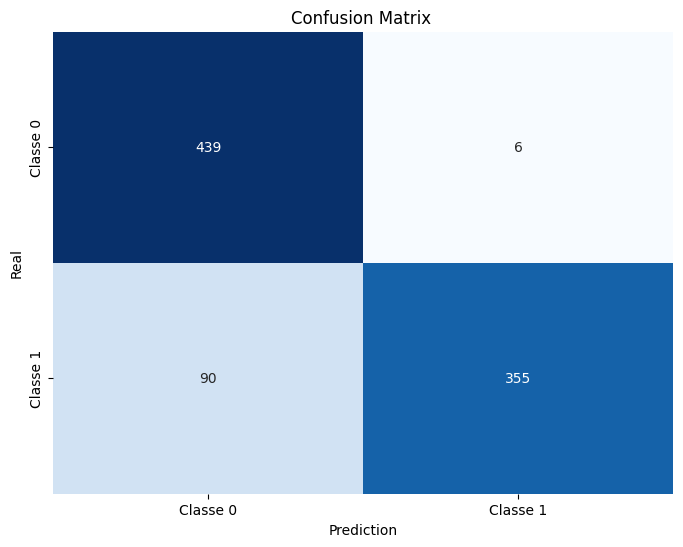

In [40]:
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix :")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Confusion Matrix ')
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.show()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
86/89 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.5524 - loss: 2.1323
Epoch 1: val_loss improved from inf to 0.80937, saving model to ann_best_model.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 33s 305ms/step - accuracy: 0.5567 - loss: 2.1396 - val_accuracy: 0.8287 - val_loss: 0.8094 - learning_rate: 1.0000e-04
Epoch 2/50
86/89 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.8054 - loss: 1.3456
Epoch 2: val_loss improved from 0.80937 to 0.55532, saving model to ann_best_model.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 30s 317ms/step - accuracy: 0.8051 - loss: 1.3454 - val_accuracy: 0.9045 - val_loss: 0.5553 - learning_rate: 1.0000e-04
Epoch 3/50
86/89 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.8377 - loss: 0.7592
Epoch 3: val_loss improved from 0.55532 to 0.50476, saving model to ann_best_model.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 30s 312ms/step - accuracy: 0.8376 - loss: 0.7555 - val_accuracy: 0.9045 - val_loss: 0.5048 - learning_rate: 1.0000e-04
Epoch 4/50
86/89 ━━━━━━━━━━━━━━━━━━━━ 0s 

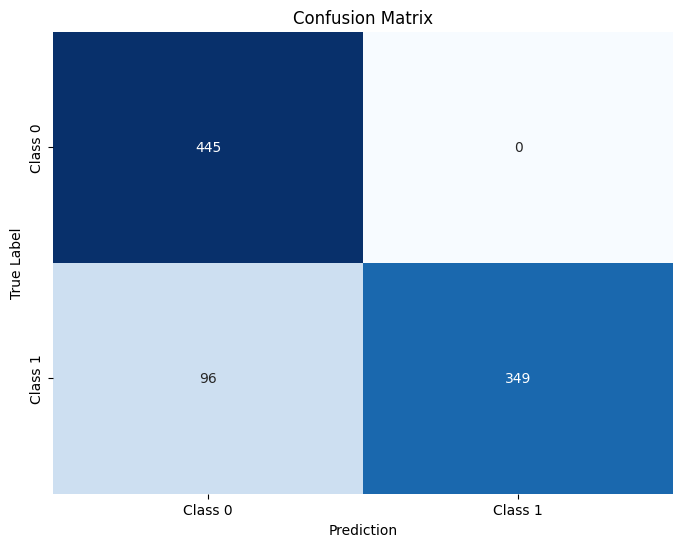

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Define the ANN model
ann_model = Sequential([
    Flatten(input_shape=(224, 224, 3)),  # Adjust input shape according to your data
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the ANN model
ann_model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
checkpoint = ModelCheckpoint('ann_best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)

# Train the model
history = ann_model.fit(
    train_generator,  # Ensure train_generator is prepared with flattened images
    validation_data=validation_generator,  # Ensure validation_generator is prepared with flattened images
    epochs=50,
    callbacks=[early_stop, checkpoint, reduce_lr]
)

# Fine-tune the model with a lower learning rate
ann_model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

history = ann_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[early_stop, checkpoint, reduce_lr]
)

# Load the best model
ann_model = tf.keras.models.load_model('ann_best_model.keras')

# Evaluate on the test set
accuracy = ann_model.evaluate(test_generator)[1]
print(f"Test Accuracy: {accuracy}")

# Generate predictions
y_pred = ann_model.predict(test_generator)
y_pred = np.round(y_pred).astype(int)  # Convert probabilities to binary class labels

# True labels
y_true = y_test

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('True Label')
plt.show()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.2126 - val_loss: 0.2078
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.2125 - val_loss: 0.2077
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.2123 - val_loss: 0.2076
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.2116 - val_loss: 0.2071
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.2065 - val_loss: 0.2000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.1787 - val_loss: 0.1752
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.1426 - val_loss: 0.1726
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.1392 - val_loss: 0.1697
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.1324 - val_loss: 0.1638
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.1206 - val_loss: 0.1545
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.1043 - val_loss: 0.1416
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0861 - val_loss: 0.1253

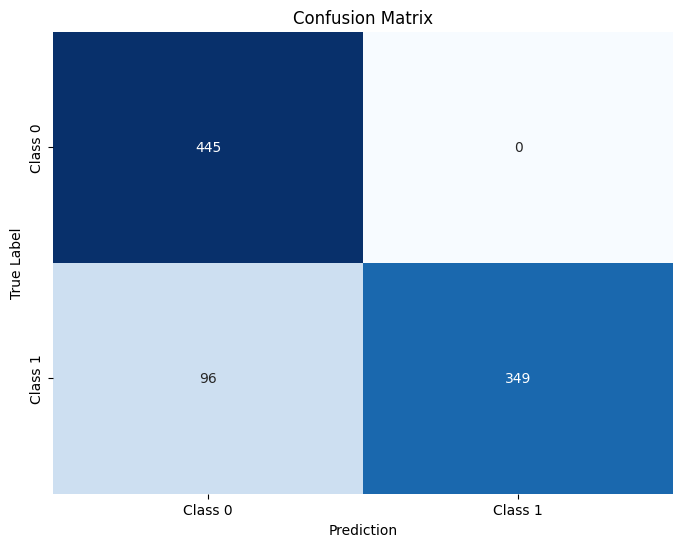

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, LSTM, TimeDistributed, RepeatVector, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Autoencoder for dimensionality reduction
def build_autoencoder(input_shape):
    input_img = Input(shape=input_shape)
    # Flatten input
    flattened = tf.keras.layers.Flatten()(input_img)
    # Encoder
    encoded = Dense(512, activation='relu')(flattened)
    encoded = Dense(256, activation='relu')(encoded)
    encoded = Dense(128, activation='relu')(encoded)
    # Decoder
    decoded = Dense(256, activation='relu')(encoded)
    decoded = Dense(512, activation='relu')(decoded)
    decoded = Dense(np.prod(input_shape), activation='sigmoid')(decoded)
    decoded = tf.keras.layers.Reshape(input_shape)(decoded)

    autoencoder = Model(input_img, decoded)
    encoder = Model(input_img, encoded)

    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder, encoder

# Prepare data for LSTM (encode images using autoencoder)
def prepare_lstm_data(data_generator, encoder):
    encoded_data = []
    true_labels = []

    for batch_images, batch_labels in data_generator:
        encoded_batch = encoder.predict(batch_images)
        encoded_data.append(encoded_batch)
        true_labels.append(batch_labels)

        if len(encoded_data) >= len(data_generator):  # Ensure complete traversal
            break

    encoded_data = np.concatenate(encoded_data, axis=0)
    true_labels = np.concatenate(true_labels, axis=0)

    # Reshape for LSTM input: (samples, timesteps, features)
    lstm_data = encoded_data.reshape(encoded_data.shape[0], 1, encoded_data.shape[1])
    return lstm_data, true_labels

# Build and compile the LSTM model
model_lstm = Sequential([
    LSTM(128, activation='relu', input_shape=(1, 128), return_sequences=True),
    Dropout(0.5),
    LSTM(64, activation='relu', return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
checkpoint = ModelCheckpoint('lstm_best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)

# Build autoencoder and encoder
autoencoder, encoder = build_autoencoder((224, 224, 3))

# Train autoencoder
train_images, train_labels = next(iter(train_generator))
validation_images, validation_labels = next(iter(validation_generator))

autoencoder.fit(
    train_images, train_images,
    validation_data=(validation_images, validation_images),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop]
)

# Prepare data for LSTM
train_lstm_data, train_lstm_labels = prepare_lstm_data(train_generator, encoder)
validation_lstm_data, validation_lstm_labels = prepare_lstm_data(validation_generator, encoder)
test_lstm_data, test_lstm_labels = prepare_lstm_data(test_generator, encoder)

# Train LSTM model
history = model_lstm.fit(
    train_lstm_data, train_lstm_labels,
    validation_data=(validation_lstm_data, validation_lstm_labels),
    epochs=50,
    callbacks=[early_stop, checkpoint, reduce_lr]
)

# Evaluate the model on the test set
model_lstm = tf.keras.models.load_model('lstm_best_model.keras')
accuracy = model_lstm.evaluate(test_lstm_data, test_lstm_labels)[1]
print(f"Test Accuracy: {accuracy}")

# Generate predictions
y_pred = model_lstm.predict(test_lstm_data)
y_pred = np.round(y_pred).astype(int)  # Convert probabilities to binary class labels

# Print classification report and confusion matrix
y_true = test_lstm_labels
print("Classification Report:")
print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('True Label')
plt.show()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.2170 - val_loss: 0.1964
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.2169 - val_loss: 0.1962
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.2165 - val_loss: 0.1960
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.2131 - val_loss: 0.1975
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.1884 - val_loss: 0.1833
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.1371 - val_loss: 0.1826
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.1254 - val_loss: 0.1801
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.1188 - val_loss: 0.1756
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.1079 - val_loss: 0.1687
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0929 - val_loss: 0.1595
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0756 - val_loss: 0.1486
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0581 - val_loss: 0.1377


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


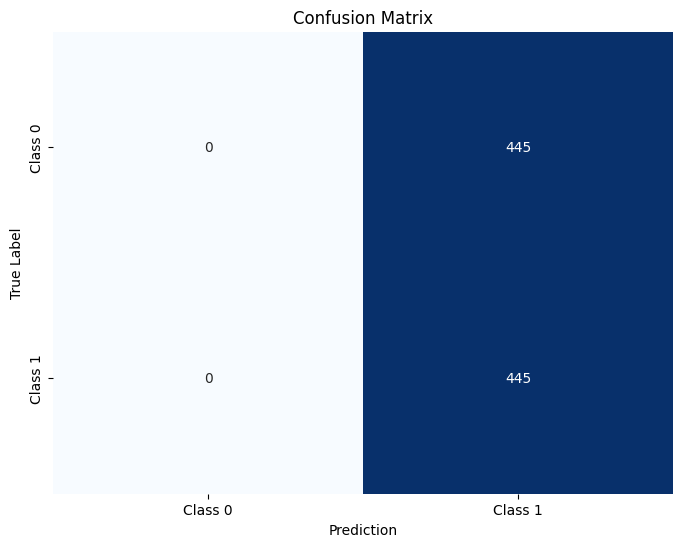

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, LSTM, GRU, TimeDistributed, RepeatVector, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Autoencoder for dimensionality reduction
def build_autoencoder(input_shape):
    input_img = Input(shape=input_shape)
    # Flatten input
    flattened = tf.keras.layers.Flatten()(input_img)
    # Encoder
    encoded = Dense(512, activation='relu')(flattened)
    encoded = Dense(256, activation='relu')(encoded)
    encoded = Dense(128, activation='relu')(encoded)
    # Decoder
    decoded = Dense(256, activation='relu')(encoded)
    decoded = Dense(512, activation='relu')(decoded)
    decoded = Dense(np.prod(input_shape), activation='sigmoid')(decoded)
    decoded = tf.keras.layers.Reshape(input_shape)(decoded)

    autoencoder = Model(input_img, decoded)
    encoder = Model(input_img, encoded)

    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder, encoder

# Prepare data for GRU (encode images using autoencoder)
def prepare_gru_data(data_generator, encoder):
    encoded_data = []
    true_labels = []

    for batch_images, batch_labels in data_generator:
        encoded_batch = encoder.predict(batch_images)
        encoded_data.append(encoded_batch)
        true_labels.append(batch_labels)

        if len(encoded_data) >= len(data_generator):  # Ensure complete traversal
            break

    encoded_data = np.concatenate(encoded_data, axis=0)
    true_labels = np.concatenate(true_labels, axis=0)

    # Reshape for GRU input: (samples, timesteps, features)
    gru_data = encoded_data.reshape(encoded_data.shape[0], 1, encoded_data.shape[1])
    return gru_data, true_labels

# Build and compile the GRU model
model_gru = Sequential([
    GRU(128, activation='relu', input_shape=(1, 128), return_sequences=True),
    Dropout(0.5),
    GRU(64, activation='relu', return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_gru.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
checkpoint = ModelCheckpoint('gru_best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)

# Build autoencoder and encoder
autoencoder, encoder = build_autoencoder((224, 224, 3))

# Train autoencoder
train_images, train_labels = next(iter(train_generator))
validation_images, validation_labels = next(iter(validation_generator))

autoencoder.fit(
    train_images, train_images,
    validation_data=(validation_images, validation_images),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop]
)

# Prepare data for GRU
train_gru_data, train_gru_labels = prepare_gru_data(train_generator, encoder)
validation_gru_data, validation_gru_labels = prepare_gru_data(validation_generator, encoder)
test_gru_data, test_gru_labels = prepare_gru_data(test_generator, encoder)

# Train GRU model
history = model_gru.fit(
    train_gru_data, train_gru_labels,
    validation_data=(validation_gru_data, validation_gru_labels),
    epochs=50,
    callbacks=[early_stop, checkpoint, reduce_lr]
)

# Evaluate the model on the test set
model_gru = tf.keras.models.load_model('gru_best_model.keras')
accuracy = model_gru.evaluate(test_gru_data, test_gru_labels)[1]
print(f"Test Accuracy: {accuracy}")

# Generate predictions
y_pred = model_gru.predict(test_gru_data)
y_pred = np.round(y_pred).astype(int)  # Convert probabilities to binary class labels

# Print classification report and confusion matrix
y_true = test_gru_labels
print("Classification Report:")
print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('True Label')
plt.show()

In [44]:
# Autoencoder for dimensionality reduction
def build_autoencoder(input_shape):
    input_img = Input(shape=input_shape)
    # Flatten input
    flattened = tf.keras.layers.Flatten()(input_img)
    # Encoder
    encoded = Dense(512, activation='relu')(flattened)
    encoded = Dense(256, activation='relu')(encoded)
    encoded = Dense(128, activation='relu')(encoded)
    # Decoder
    decoded = Dense(256, activation='relu')(encoded)
    decoded = Dense(512, activation='relu')(decoded)
    decoded = Dense(np.prod(input_shape), activation='sigmoid')(decoded)
    decoded = tf.keras.layers.Reshape(input_shape)(decoded)

    autoencoder = Model(input_img, decoded)
    encoder = Model(input_img, encoded)

    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder, encoder

# Prepare data for RNN (encode images using autoencoder)
def prepare_rnn_data(data_generator, encoder):
    encoded_data = []
    true_labels = []

    for batch_images, batch_labels in data_generator:
        encoded_batch = encoder.predict(batch_images)
        encoded_data.append(encoded_batch)
        true_labels.append(batch_labels)

        if len(encoded_data) >= len(data_generator):  # Ensure complete traversal
            break

    encoded_data = np.concatenate(encoded_data, axis=0)
    true_labels = np.concatenate(true_labels, axis=0)

    # Reshape for RNN input: (samples, timesteps, features)
    rnn_data = encoded_data.reshape(encoded_data.shape[0], 1, encoded_data.shape[1])
    return rnn_data, true_labels

# Build and compile the RNN model
model_rnn = Sequential([
    SimpleRNN(128, activation='softmax', input_shape=(1, 128), return_sequences=True),
    Dropout(0.5),
    SimpleRNN(64, activation='softmax', return_sequences=True),
    Dropout(0.5),
    SimpleRNN(32, activation='softmax', return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
checkpoint = ModelCheckpoint('rnn_best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)

# Build autoencoder and encoder
autoencoder, encoder = build_autoencoder((224, 224, 3))

# Train autoencoder
train_images, train_labels = next(iter(train_generator))
validation_images, validation_labels = next(iter(validation_generator))

autoencoder.fit(
    train_images, train_images,
    validation_data=(validation_images, validation_images),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop]
)

# Prepare data for RNN
train_rnn_data, train_rnn_labels = prepare_rnn_data(train_generator, encoder)
validation_rnn_data, validation_rnn_labels = prepare_rnn_data(validation_generator, encoder)
test_rnn_data, test_rnn_labels = prepare_rnn_data(test_generator, encoder)

# Train RNN model
history = model_rnn.fit(
    train_rnn_data, train_rnn_labels,
    validation_data=(validation_rnn_data, validation_rnn_labels),
    epochs=50,
    callbacks=[early_stop, checkpoint, reduce_lr]
)

# Evaluate the model on the test set
model_rnn = tf.keras.models.load_model('rnn_best_model.keras')
accuracy = model_rnn.evaluate(test_rnn_data, test_rnn_labels)[1]
print(f"Test Accuracy: {accuracy}")

# Generate predictions
y_pred = model_rnn.predict(test_rnn_data)
y_pred = np.round(y_pred).astype(int)  # Convert probabilities to binary class labels

# Print classification report and confusion matrix
y_true = test_rnn_labels
print("Classification Report:")
print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('True Label')
plt.show()


NameError: name 'SimpleRNN' is not defined